In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fm = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fm.load_data()

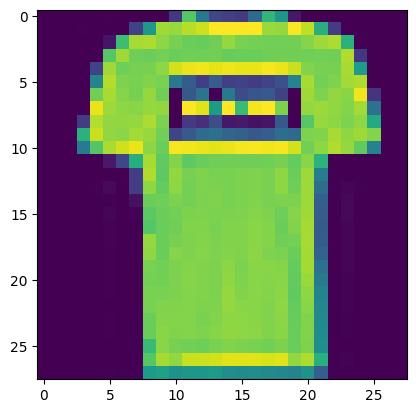

In [4]:
plt.imshow(x_train_full[1])

In [5]:
class_names = ["T-Shirt","Trousers","Pullover","Dress","Coat",
               "sandal","shirt","Sneaker","Bag","Ankle boot"]

In [6]:
class_names[y_train_full[10]]

'T-Shirt'

In [7]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Normalization

In [9]:
x_train_n = x_train_full/255.0
x_test_n = x_test/255.0


## Test validation Train Splitup

train -> Train the dataset 
validate -> Tune the Hyperparameter and evaluate the model
Test -> used to test the model after the model has gone through initial vetting by the validator 


In [13]:
x_valid,x_train = x_train_n[:5000],x_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
x_test = x_test_n

In [14]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
import pydot 
keras.utils.plot_model(model)

ModuleNotFoundError: No module named 'pydot'

In [27]:
weights,biases = model.layers[1].get_weights()

In [29]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "sgd",metrics =["accuracy"])

In [32]:
model_history=model.fit(x_train,y_train,epochs=30,
                       validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7170 - accuracy: 0.7605 - val_loss: 0.5159 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4862 - accuracy: 0.8304 - val_loss: 0.4326 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4392 - accuracy: 0.8452 - val_loss: 0.5251 - val_accuracy: 0.8010
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4126 - accuracy: 0.8562 - val_loss: 0.3935 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3942 - accuracy: 0.8619 - val_loss: 0.3784 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3763 - accuracy: 0.8674 - val_loss: 0.3752 - val_accuracy: 0.8748
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3645 - accuracy: 0.8710 - val_loss: 0.3656 - val_accuracy:

In [33]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [34]:
model_history.history

{'loss': [0.717036783695221,
  0.4861776530742645,
  0.4391902685165405,
  0.4125616252422333,
  0.3941514194011688,
  0.37626951932907104,
  0.36445990204811096,
  0.35339903831481934,
  0.34337204694747925,
  0.3344530463218689,
  0.32631734013557434,
  0.3173709213733673,
  0.31039926409721375,
  0.30394744873046875,
  0.29682889580726624,
  0.29154452681541443,
  0.28587818145751953,
  0.28015610575675964,
  0.2749253511428833,
  0.269916296005249,
  0.2649384140968323,
  0.2600959241390228,
  0.2558393180370331,
  0.25225570797920227,
  0.24752368032932281,
  0.24328796565532684,
  0.23988012969493866,
  0.2363099902868271,
  0.23182152211666107,
  0.2288767397403717],
 'accuracy': [0.760454535484314,
  0.8304363489151001,
  0.8451636433601379,
  0.8561636209487915,
  0.8618727326393127,
  0.8673636317253113,
  0.8710363507270813,
  0.8753272891044617,
  0.8791636228561401,
  0.880509078502655,
  0.8835636377334595,
  0.8861818313598633,
  0.888909101486206,
  0.8914363384246826,


(0.0, 1.0)

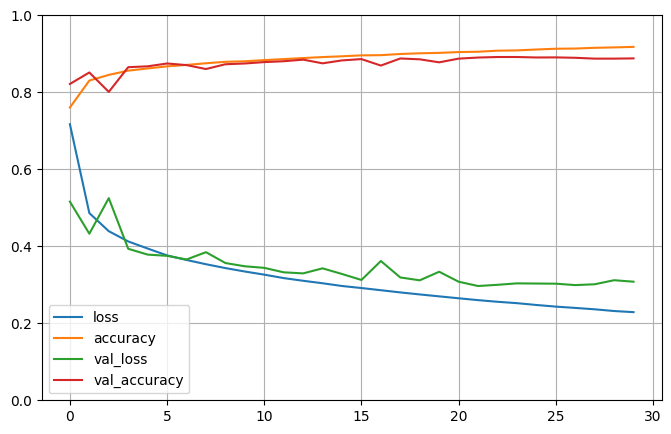

In [35]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [39]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8803


[0.33841854333877563, 0.880299985408783]